In [182]:
 %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("/Users/arunash/kaggle-titanic/loan_prediction/data/train.csv") #Reading the dataset in a dataframe using Pandas

test_data = pd.read_csv("/Users/arunash/kaggle-titanic/loan_prediction/data/test.csv") #Reading the dataset in a dataframe

In [183]:
df.head(10) #Print first 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [184]:
df.describe() #get numerical summary
#Some inferences can be drawn from this
#LoanAmount has 614-592 = 22 missing values.
#Loan_Amount_Term has (614 – 600) 14 missing values.
#Credit_History has (614 – 564) 50 missing values.
#84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
#ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
#We can get idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [185]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [186]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

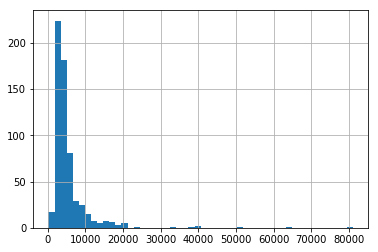

In [187]:
#Distribution Analysis
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)

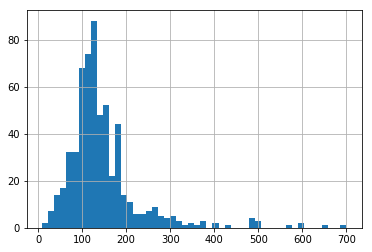

In [188]:
#Distribution Analysis
%matplotlib inline
df['LoanAmount'].hist(bins=50)

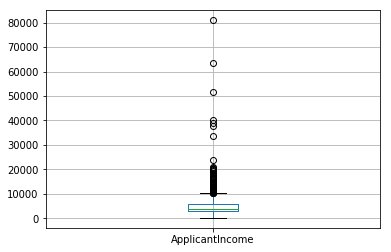

In [189]:
df.boxplot(column='ApplicantIncome')
#outliers and extreme values due to income disparities different factors contributing to it like education

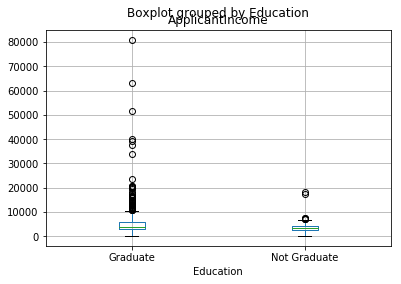

In [190]:
df.boxplot(column='ApplicantIncome', by = 'Education')
#no substantial different between the 
#mean income of graduate and non-graduates. 
#But there are a higher number of graduates with very high incomes, 
#which are appearing to be the outliers.



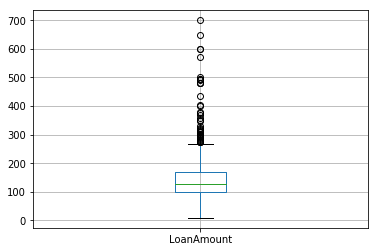

In [191]:
df.boxplot(column='LoanAmount')
#both ApplicantIncome and LoanAmount require some amount of data munging.
#LoanAmount has missing and well as extreme values values, 
#while ApplicantIncome has a few extreme values, 
#which demand deeper understanding. #

In [192]:
#1 – Boolean Indexing
# filter values of a column based on conditions from another set of columns
#all females who are not graduate and got a loan
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]


,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [193]:
#Apply Function
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print df.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print df.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
0    1
1    0
2    0
3    0
4    0
dtype: int64


In [194]:
#Pivot table
#key column is “LoanAmount” which has missing values. 
#We can impute it using mean amount of 
#each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. 
#The mean ‘LoanAmount’ of each group can be determined as:

impute_grps = df.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps

                              LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556


In [195]:
#Pivot table on credit history
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


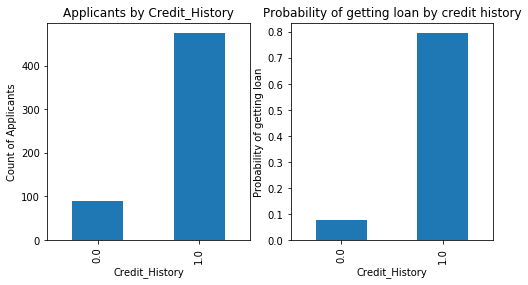

In [196]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

#the chances of getting a loan are eight-fold if the applicant has a valid credit history.
#You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

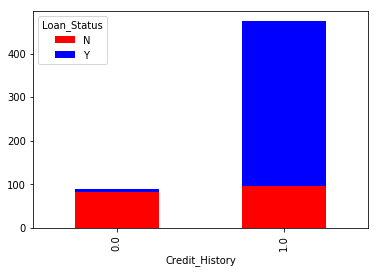

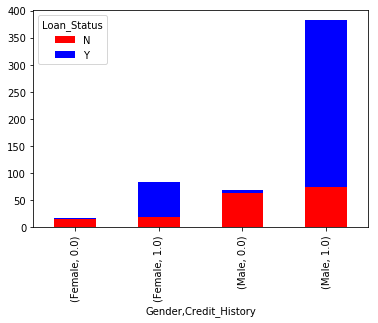

In [197]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
temp4 = pd.crosstab([df['Gender'], df['Credit_History']], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# two basic classification algorithms here,
#one based on credit history, while other on 2 categorical variables 
#(including gender)

In [198]:
#Data munging 
#fixing problems in the data set, which needs to be solved before the data 
#is ready for a good model. This exercise is typically referred as “Data Munging”.
#Missing values + Extreme values
#In addition to these problems with numerical fields,
#we should also look at the non-numerical fields 
#i.e. Gender, Property_Area, Married, Education and Dependents

#Finding missing values:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [199]:
#Filling missing amounts in loan amoutn
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
#Other way is build a supervised learning model to predict loan amount 
# on the basis of other variables and then use age along with other variables to predict survival.

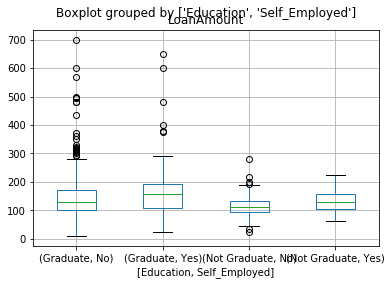

In [200]:
#Lets take a hypothesis is that the whether a 
#person is educated or self-employed can combine to 
#give a good estimate of loan amount.
df.boxplot(column='LoanAmount', by = ['Education', 'Self_Employed'])

In [201]:
#Self_Employed has missing values 
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [202]:
#Majority is no so impute Self_Employed to No
df['Self_Employed'].fillna('No',inplace=True)

In [203]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

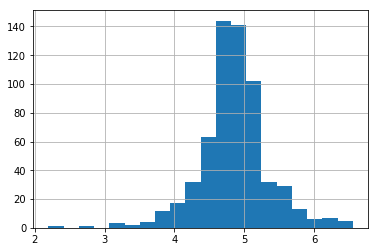

In [204]:
#treat for extreme values in distribution of LoanAmount and ApplicantIncome
# Let’s analyze LoanAmount first. Since the extreme values 
#are practically possible, i.e. some people might apply for 
#high value loans due to specific needs. So instead of 
#treating them as outliers, 
#let’s try a log transformation to nullify their effect:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

#distribution looks much closer to normal and 
#effect of extreme values has been significantly subsided.

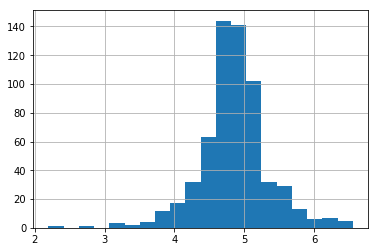

In [205]:
#Coming to ApplicantIncome.
#One intuition can be that some applicants have lower income 
#but strong support Co-applicants. 
#So it might be a good idea to combine both incomes 
#as total income and take a log transformation of the same.

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 



In [206]:
#Building predictive model
# Skicit-Learn (sklearn) is the most commonly used library 
#in Python for this purpose
# sklearn requires all inputs to be numeric, 
#we should convert all our categorical variables into numeric
#by encoding the categories. 
#This can be done using the following code:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Credit_History','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [207]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [208]:
#So let’s make our first model with ‘Credit_History’.
#We can try different combination of variables:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [209]:
from sklearn.preprocessing import LabelEncoder
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)
var_mod = ['Credit_History','Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])
test_data.dtypes
predictions = model.predict(test_data[predictor_var])
test_data["Loan_Status"] = pd.Series(predictions)
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

Accuracy : 83.062%
Cross-Validation Score : 79.484%


In [210]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 90.391%
Cross-Validation Score : 68.397%


In [211]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.179%
